In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
np.random.seed(0)

In [5]:
x, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std = 0.9)

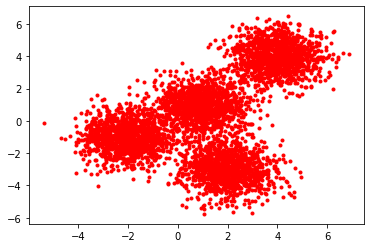

In [17]:
plt.scatter(x[:, 0], x[:, 1], marker='.', color='red')

In [20]:
k_means = KMeans(init= "k-means++", n_clusters = 4, n_init = 12)

In [23]:
k_means.fit(x)

KMeans(n_clusters=4, n_init=12)

In [26]:
k_means_labels = k_means.labels_

In [28]:
k_means_cluster_centers = k_means.cluster_centers_

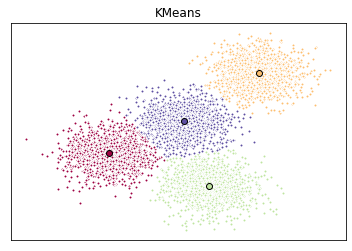

In [32]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

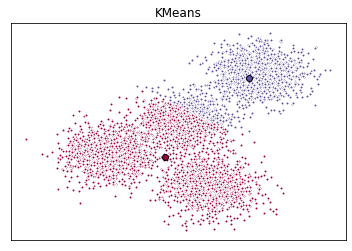

In [38]:
#clustering data to into two 
k_means = KMeans(init= "k-means++", n_clusters = 2, n_init = 12)
k_means.fit(x)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [39]:
#this time getting real-world data from ibm object storage
!wget -O Cust_Segmentation.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv

--2021-05-24 00:37:06--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33426 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  32.64K  --.-KB/s    in 0.07s   

2021-05-24 00:37:07 (437 KB/s) - ‘Cust_Segmentation.csv’ saved [33426/33426]



In [47]:
df = pd.read_csv('Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [48]:
#pre-process
df = df.drop("Address", axis=1)

#normalization
from sklearn.preprocessing import StandardScaler
x = df.values[:, 1:]
x = np.nan_to_num(x)
clus_dataSet = StandardScaler().fit_transform(x)

In [52]:
#modelling
cluster_num = 3
k_means = KMeans(init = "k-means++", n_clusters = cluster_num, n_init = 12)
k_means.fit(x)
labels = k_means.labels_
print(labels)

[2 0 2 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 2
 2 2 2 2 0 2 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 0 2 0 0 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 

In [54]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [57]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761


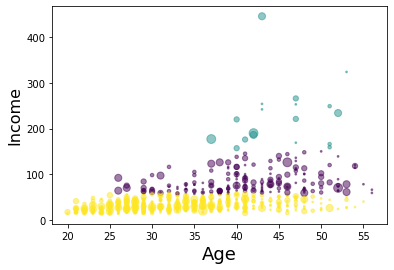

In [61]:
area = np.pi * (x[:, 1]) ** 2
plt.scatter(x[:, 0], x[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Income', fontsize = 16)
plt.show()

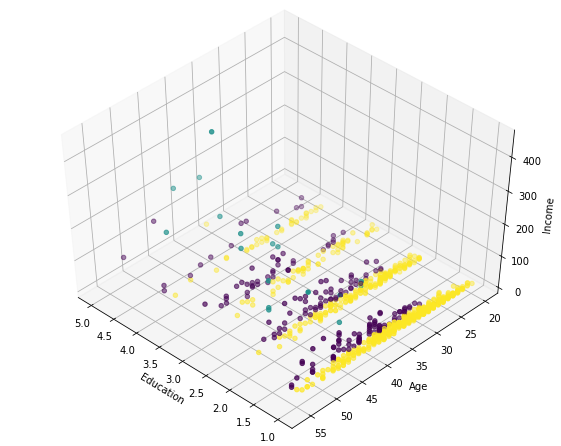

In [63]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8 ,6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(x[:, 1], x[:, 0], x[:, 3], c= labels.astype(np.float))